<a href="https://colab.research.google.com/github/LuiguiUNAB/CIENCIA_DATOS_2025/blob/main/CLASE_3_Medidas_de_tendencia_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###MEDIA
La media es el promedio de un conjunto de datos (la suma dividida entre la cantidad).
La mediana es el valor que queda en el centro cuando los datos están ordenados.

#MEDIDAS DE TENDENCIA CENTRAL
1. Trabajando con dataframes
2. Overview (Miraditas) de los datos
3. Obtener las medidas centrales
4. Analizar Gráficas

1. Trabajando con Dataframes

In [2]:
!pip install statsmodels

In [3]:
!pip install wquantiles

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wquantiles
from scipy.stats import trim_mean
from statsmodels import robust

In [7]:
estado=pd.read_csv("/content/Clase3.csv")

In [8]:
estado.sample(5)

,State,Population,Murder.Rate,Abbreviation
27,Nevada,2700551,6.0,NV
26,Nebraska,1826341,2.9,NE
18,Maine,1328361,1.6,ME
37,Pennsylvania,12702379,4.8,PA
35,Oklahoma,3751351,4.5,OK


In [11]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2. Overview de los datos
Analizar las columnas presentes en el dataframe

In [14]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [16]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [17]:
estado.describe()
#Saca medidas de tendencia central

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2.1 Estimando las tasas de población y asesinatos

In [19]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [21]:
estado["Population"].mean()

np.float64(6162876.3)

In [23]:
estado["Population"].median()

4436369.5

In [24]:
#Media truncada
trim_mean(estado["Population"], 0.1)

np.float64(4783697.125)

In [26]:
#Media ponderada de asesinatos
estado["Murder.Rate"].mean()

np.float64(4.066)

In [31]:
# Media ponderadada de asesinatos
np.average(estado["Murder.Rate"], weights=estado.Population)

np.float64(4.445833981123393)

In [29]:
#Mediana ponderada de asesinatos
wquantiles.median(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.4)

<Axes: >

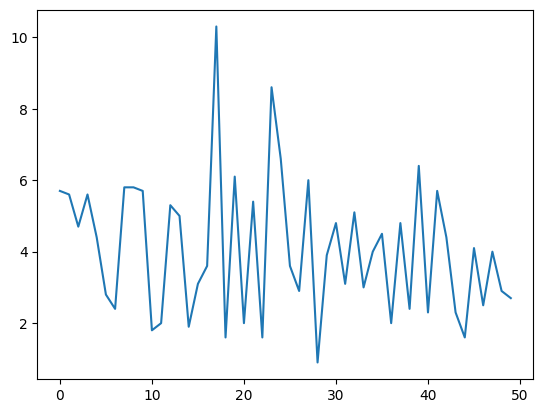

In [34]:
estado["Murder.Rate"].plot.line()

<Axes: >

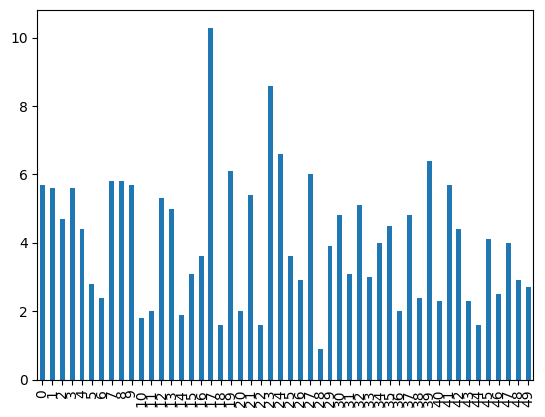

In [35]:
estado["Murder.Rate"].plot.bar()

<Axes: >

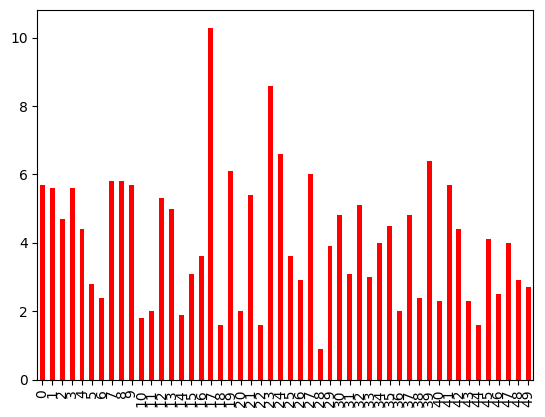

In [37]:
estado["Murder.Rate"].plot.bar(color="red")

<function matplotlib.pyplot.show(close=None, block=None)>

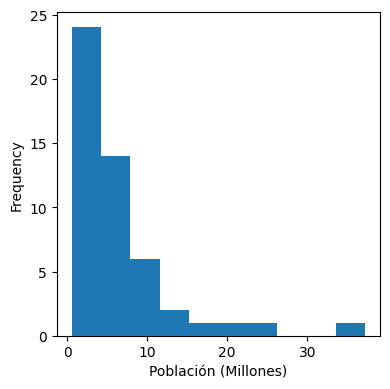

In [44]:
ax = (estado.Population/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población (Millones)")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

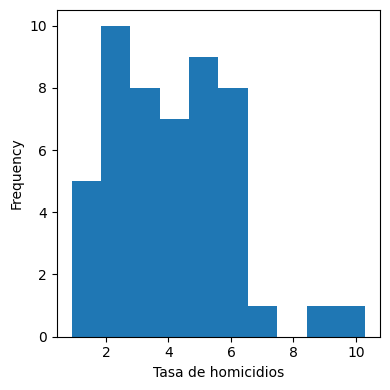

In [45]:
ax = (estado["Murder.Rate"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de homicidios")
plt.tight_layout()
plt.show

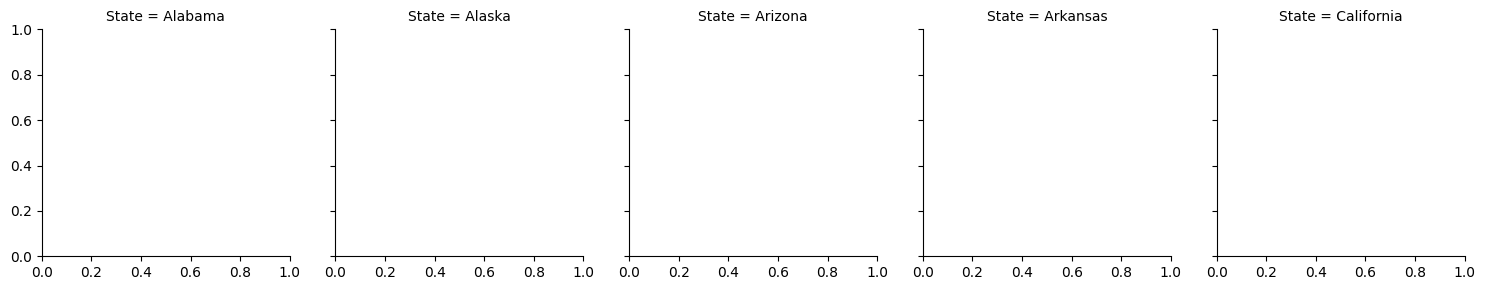

In [49]:
analisis=estado.head()
g = sns.FacetGrid(analisis,col="State")
g = map(sns.histplot,"Murder.Rate")